In [4]:
import tensorflow as tf
import os

In [7]:
MODEL_NAME = 'Classification'

In [19]:
latest_model = os.listdir(path=f"Model/{MODEL_NAME}")[0]
print(f'Model/{MODEL_NAME}/{latest_model}')
model = tf.keras.models.load_model(f'Model/{MODEL_NAME}/{latest_model}')

Model/Classification/classification_modelv2.h5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

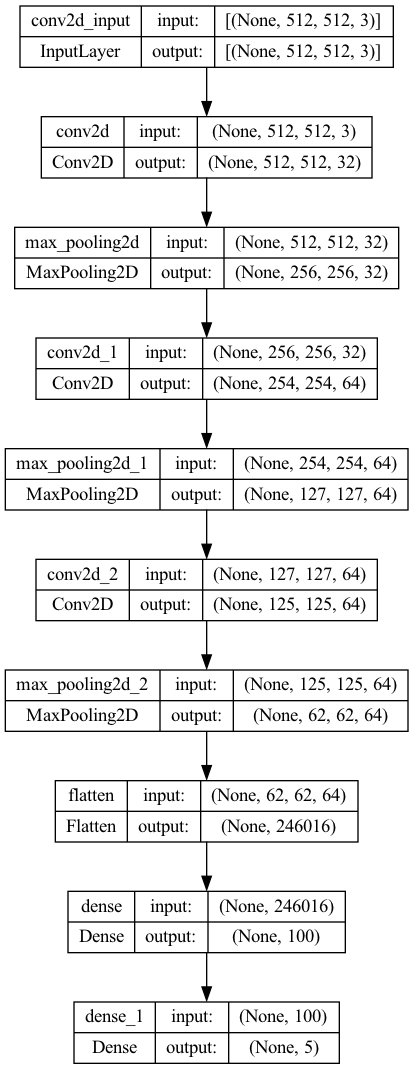

In [9]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
import netron
netron.start(f'Model/{MODEL_NAME}/{latest_model}')

In [10]:
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):     
    fig, ax = plt.subplots(figsize=(15, 5))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [18]:
import json

latest_history_path = os.listdir(path=f'PlotGraphs/{MODEL_NAME}')[0]
print(f'PlotGraphs/{MODEL_NAME}/{latest_history_path}')
with open(f'PlotGraphs/{MODEL_NAME}/{latest_history_path}') as json_file:
    history = json.load(json_file)

PlotGraphs/Classification/history.json


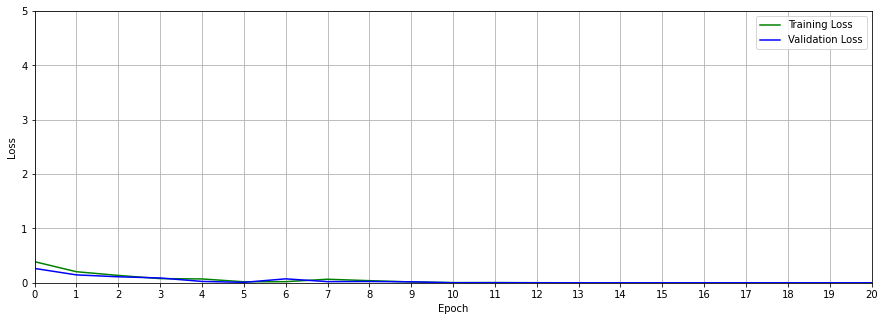

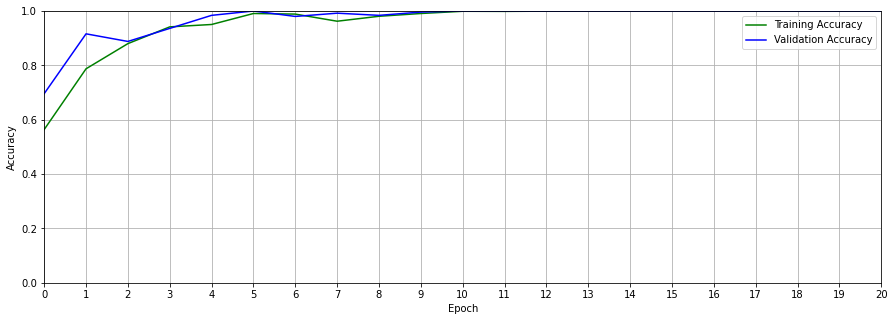

In [14]:
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

plot_results([loss, val_loss],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"])
 
plot_results([accuracy, val_accuracy], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])